In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("datasets/04/titanic/train.csv")
test = pd.read_csv("datasets/04/titanic/test.csv")

<hr>

# 1 EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# procento chybejicich hodnot 
((train.isna().sum()/(train.shape[0]))*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

77% hodnot z atributu `Cabin` nam chybi. Atribut vyhodime

## 1.1 Numericke atributy

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

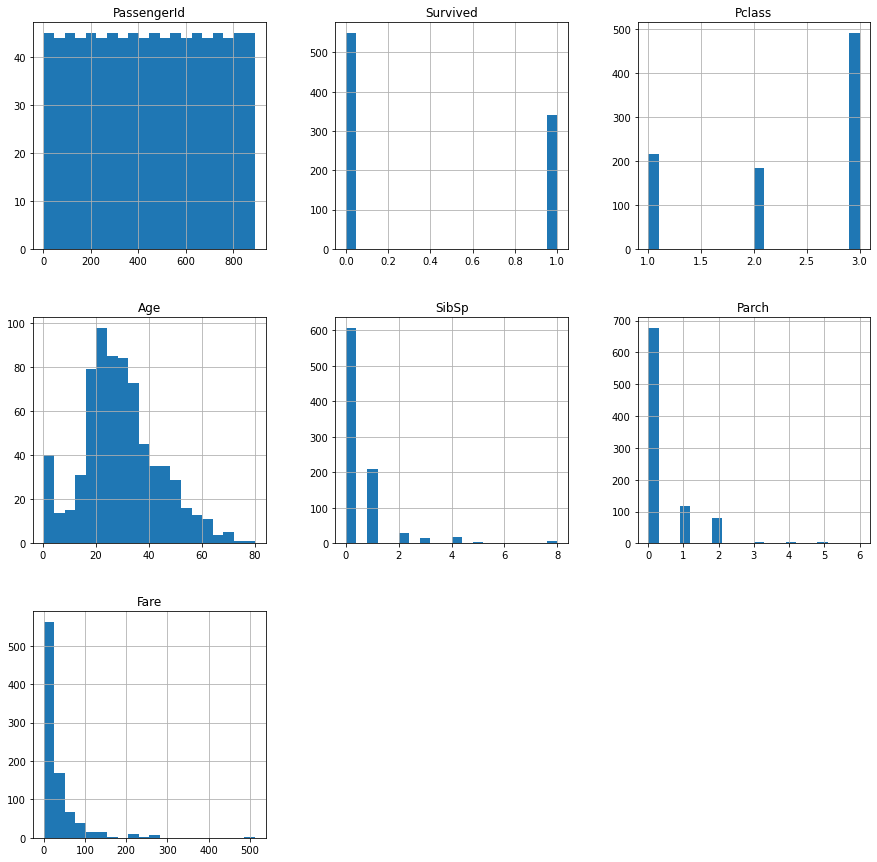

In [8]:
train.hist(figsize=(15,15), bins=20)

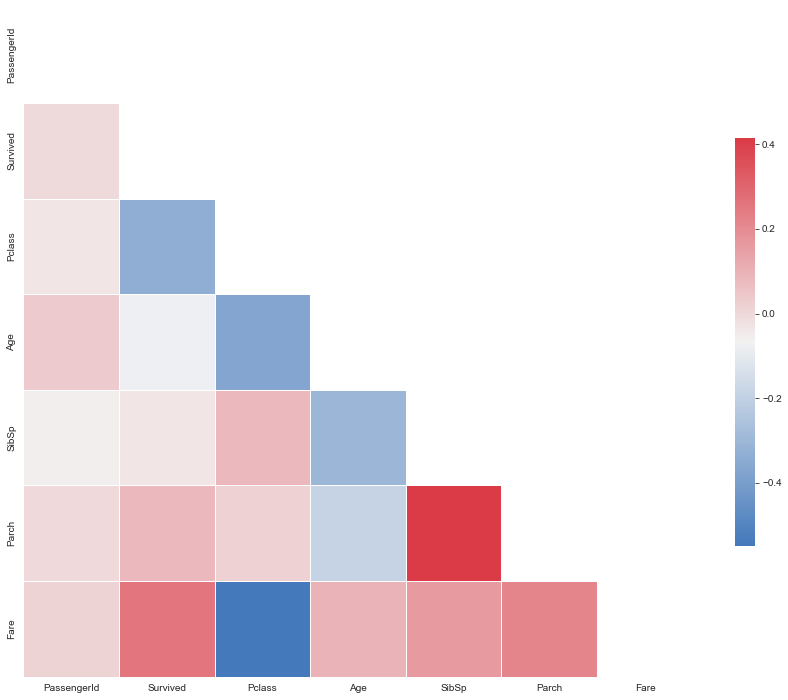

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

def CorrMtx(df):
    
    mask = np.zeros_like(df, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
 
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))
 
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
 
    # Draw correlation plot
    sns.heatmap(df, cmap=cmap, mask=mask,
            square=True,
            linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
 
CorrMtx(train.corr())

## 1.2 Kategorialni atributy

In [10]:
train["Name"][0:50]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

Převést jméno na užitečnou reprezentaci pro model bude obtížné, ale něco půjde vymyslet

In [11]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
to_replace = ['\d', '/', '.']
t = train['Ticket'].copy()
for c in to_replace:
    t = t.str.replace(c, '')
t.value_counts()

<ipython-input-13-61f7d763d5a6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  t = t.str.replace(c, '')
<ipython-input-13-61f7d763d5a6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t = t.str.replace(c, '')


               661
PC              60
CA              41
A               28
SOTONOQ         15
STONO           12
WC              10
SCPARIS          7
STONO            6
SOC              6
FCC              5
C                5
SCParis          4
LINE             4
WEP              3
PP               3
SOPP             3
SCAH             2
SOTONO           2
SWPP             2
PPP              2
FC               1
SCAH Basle       1
AS               1
SP               1
SC               1
SCOW             1
Fa               1
SOP              1
SCA              1
CASOTON          1
Name: Ticket, dtype: int64

In [14]:
train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<hr>

# 2 Feature engineering

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# ID nic nerika, Cabin ze 77% prazdne
train = train.drop(['PassengerId', 'Cabin'], axis=1)

In [20]:
def replace_chars(col, to_replace=to_replace):
    for c in to_replace:
        col = col.str.replace(c, '')
    col.replace('', 'No ticket category')
    return col

In [21]:
class NewAttribsAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X): 
        X["RelativesCount"] = X["SibSp"] + X["Parch"]
        X["FamilySize"] = pd.cut(X['RelativesCount'], 4)
        X["HasRelatives"] = X["RelativesCount"] > 0

        X["IsChild"] = X["Age"] <= 15
        # X["AgeBucket"] = X["Age"] // 15 * 15
        X["AgeBucket"] = pd.qcut(X['Age'], 5, labels=False)

        X['FareBucket'] = pd.qcut(X['Fare'], 3, labels=False)

        X['Ticket'] = replace_chars(X['Ticket'])

        X['Title'] = X['Name'].str.extract('([A-Za-z]+)\.')[0]
        return X

In [22]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [23]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False))
])

In [24]:
transformer_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['Age', 'SibSp', 'Parch', 'Fare', 'RelativesCount']),
    ('cat', cat_pipeline, ['Pclass', 'Sex', 'Embarked', 'HasRelatives', 'AgeBucket', 'FamilySize', 'IsChild', 'FareBucket', 'Title']),
])

In [25]:
full_pipeline = Pipeline([
    ('new', NewAttribsAdder()),
    ('transformer', transformer_pipeline)
])

In [26]:
X_train = full_pipeline.fit_transform(train.copy())
y_train = train["Survived"]

X_test = full_pipeline.fit_transform(test.copy())

<ipython-input-20-3a8a23154734>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  col = col.str.replace(c, '')
<ipython-input-20-3a8a23154734>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = col.str.replace(c, '')
<ipython-input-20-3a8a23154734>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  col = col.str.replace(c, '')
<ipython-input-20-3a8a23154734>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = col.str.replace(c, '')


In [27]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.565736,0.432793,-0.473674,-0.502445,0.059160,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.663861,0.432793,-0.473674,0.786845,0.059160,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.560975,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.433312,0.432793,-0.473674,0.420730,0.059160,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.433312,-0.474545,-0.473674,-0.486337,-0.560975,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,-0.560975,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,-0.796286,-0.474545,-0.473674,-0.044381,-0.560975,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,-0.104637,0.432793,2.008933,-0.176263,1.299429,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,-0.258337,-0.474545,-0.473674,-0.044381,-0.560975,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<hr>

# 3 Modeling

In [28]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [29]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, models: list) -> pd.DataFrame:
    best_f1 = 0
    best_f1_model = ''
    best_acc = 0
    for name, model in models:
        print("-----")
        print(f"Model {name}")
        f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()*100
        acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()*100
        if f1 > best_f1:
            best_f1 = f1
            best_f1_model = name
        if acc > best_acc:
            best_acc = acc
            best_acc_model = name
        print(f"F1: {f1:.1f}")
        print(f"Accuracy: {acc:.1f}")
    
    print('-----')
    print("Best models:")
    print("By F1 score:", best_f1_model, '{:.1f}'.format(best_f1))
    print("By accuracy: ", best_acc_model, '{:.1f}'.format(best_acc))

In [40]:
 models = [
    ('LogReg', LogisticRegression()), 
    ('RF', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True)), 
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

In [31]:
run_exps(X_train, y_train, models)

-----
Model LogReg
F1: 74.5
Accuracy: 81.0
-----
Model RF
F1: 75.2
Accuracy: 81.1
-----
Model KNN
F1: 74.7
Accuracy: 81.4
-----
Model SVM
F1: 77.0
Accuracy: 83.3
-----
Model XGB
F1: 75.4
Accuracy: 81.8
-----
Best models:
By F1 score: SVM 77.0
By accuracy:  SVM 83.3


Dale pouzijeme SVM jelikoz dosahl nejlepsich vysledku

<hr>

# 4 Model tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = [
    {'gamma': ['scale', 'auto'], 'C': [0.5, 1, 3, 5, 10]},
]

grid = GridSearchCV(SVC(probability=True), parameters, cv=5, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 3, 5, 10], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [56]:
grid.best_params_

{'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [57]:
grid.best_score_

0.8361182599962339

## 4.1 Ensemble modelu

In [70]:
models

[('LogReg', LogisticRegression()),
 ('RF', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                eval_metric='mlogloss', gamma=None, gpu_id=None,
                importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                use_label_encoder=False, validate_parameters=None,
                verbosity=None)),
 ('SVM', SVC(C=3, gamma='auto', probability=True))]

In [69]:
del models[3]

In [65]:
models.append(('SVM', grid.best_estimator_),)

In [71]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators=models,
    voting='soft'
)

In [75]:
'{:.1f}'.format(cross_val_score(voting, X_train, y_train, cv=5).mean()*100)

'84.1'

In [76]:
'{:.1f}'.format(cross_val_score(voting, X_train, y_train, cv=5, scoring='f1').mean()*100)

'78.6'